In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.12.0'

TensorFlow constants

In [3]:
a_scalar = tf.constant(10, name="const1")
a_vector = tf.constant([10.0, 20.1], name="const2")
a_matrix = tf.constant([[20, 25.5],[5.8, 27]], name="const3")

print(a_scalar)
print(a_vector)
print(a_matrix)
print("shape of a_matrix = ", a_matrix.get_shape())
print("rank of a_matrix = ", tf.rank(a_matrix))

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor([10.  20.1], shape=(2,), dtype=float32)
tf.Tensor(
[[20.  25.5]
 [ 5.8 27. ]], shape=(2, 2), dtype=float32)
shape of a_matrix =  (2, 2)
rank of a_matrix =  tf.Tensor(2, shape=(), dtype=int32)


TensorFlow variables

In [4]:
var_1 = tf.Variable([[[1.,2.,3.,],[4.,5.,6.]],[[7.,8.,9.],[10.,11.,12.]]])
print(var_1.value())

var_1[0,1,2].assign(25)
print("new tensor after modifying an element = ")
print(var_1.value()) 
# convert in to numpy array
numpy_var = var_1.numpy()
print("data type after conversion to numpy array = ", type(numpy_var))

tf.Tensor(
[[[ 1.  2.  3.]
  [ 4.  5.  6.]]

 [[ 7.  8.  9.]
  [10. 11. 12.]]], shape=(2, 2, 3), dtype=float32)
new tensor after modifying an element = 
tf.Tensor(
[[[ 1.  2.  3.]
  [ 4.  5. 25.]]

 [[ 7.  8.  9.]
  [10. 11. 12.]]], shape=(2, 2, 3), dtype=float32)
data type after conversion to numpy array =  <class 'numpy.ndarray'>


Gradient i TensorFlow

In [5]:
x = tf.Variable(5.0);

with tf.GradientTape() as tape:
  y = x**3+ 5*x+ 2
dy_dx = tape.gradient(y, x) # calcuates the gradient 3*x**2 + 5
print(dy_dx.numpy())

80.0


In [7]:
x = tf.constant([[1.,2.,3.],[4.,5.,6.]])
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')

with tf.GradientTape(persistent=True) as tape:
  y = tf.matmul(x, w) + b
  loss = tf.reduce_mean(y**2)
  print(loss)
[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(dl_dw.shape)

tf.Tensor(22.829775, shape=(), dtype=float32)
(3, 2)


TensorFlow graph execution

In [9]:
def my_func(x, y, b):
  return tf.matmul(x,y) + b
# convert it to a Function
@tf.function
def tf_myfunc(x):
  y = tf.constant([[2.0], [3.0]])
  b = tf.constant(4.0)
  return my_func(x, y, b)
# call the function tf_myfunc
tf_myfunc(tf.constant([[10.0, 15.0]])).numpy()    

array([[69.]], dtype=float32)

Implementation of a linear regression model in TensorFlow

load the library

In [10]:
import tensorflow as tf
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

Data generation

Text(0, 0.5, 'y values')

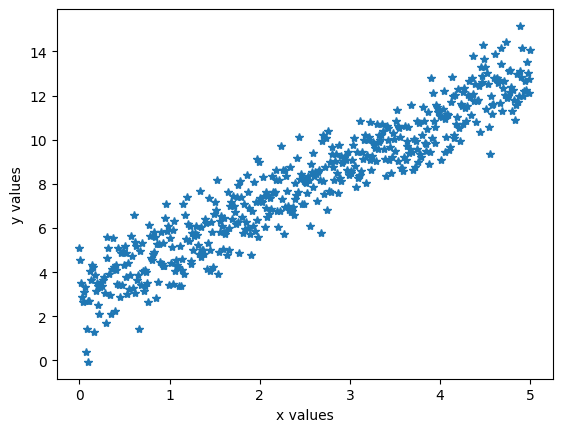

In [11]:
x = np.linspace(0.,5., 500)
y = 2 * x + 3 + np.random.randn(len(x))
plt.plot(x,y, '*')
plt.xlabel('x values')
plt.ylabel('y values')

Split of training and test data 

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 100)
print((x_train.shape,x_test.shape)) 

((375,), (125,))


Initial value declaration of the training parameters 

In [13]:
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

Defining the helper functions for calculating MSE loss function and gradient

In [14]:
def calc_mse(x, y, w, b):
    y_pred = w * x + b
    mse = tf.reduce_mean(tf.square(y_pred - y))
    return mse  

def calculate_gradient(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_value = calc_mse(x, y, w, b)
        
    w_grad, b_grad = tape.gradient(loss_value, [w, b])
    return w_grad, b_grad 

Learning of the network parameters by gradient descent 

In [15]:
num_epochs = 500
learning_rate = 0.001

loss = [];
epoch_list = []

for epoch in range(num_epochs):
    w_grad, b_grad = calculate_gradient(x_train, y_train, w, b)
         
    dW, dB = w_grad * learning_rate, b_grad * learning_rate 
    w.assign_sub(dW)
    b.assign_sub(dB)

    loss.append(calc_mse(x, y, w, b))
    epoch_list.append(epoch)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch}, loss {calc_mse(x, y, w, b):.3f}")        

Epoch: 0, loss 93.388
Epoch: 10, loss 65.915
Epoch: 20, loss 46.781
Epoch: 30, loss 33.454
Epoch: 40, loss 24.168
Epoch: 50, loss 17.696
Epoch: 60, loss 13.184
Epoch: 70, loss 10.037
Epoch: 80, loss 7.839
Epoch: 90, loss 6.304
Epoch: 100, loss 5.229
Epoch: 110, loss 4.475
Epoch: 120, loss 3.945
Epoch: 130, loss 3.570
Epoch: 140, loss 3.305
Epoch: 150, loss 3.115
Epoch: 160, loss 2.978
Epoch: 170, loss 2.877
Epoch: 180, loss 2.803
Epoch: 190, loss 2.746
Epoch: 200, loss 2.703
Epoch: 210, loss 2.668
Epoch: 220, loss 2.639
Epoch: 230, loss 2.615
Epoch: 240, loss 2.593
Epoch: 250, loss 2.574
Epoch: 260, loss 2.557
Epoch: 270, loss 2.541
Epoch: 280, loss 2.525
Epoch: 290, loss 2.511
Epoch: 300, loss 2.496
Epoch: 310, loss 2.482
Epoch: 320, loss 2.469
Epoch: 330, loss 2.455
Epoch: 340, loss 2.442
Epoch: 350, loss 2.429
Epoch: 360, loss 2.417
Epoch: 370, loss 2.404
Epoch: 380, loss 2.391
Epoch: 390, loss 2.379
Epoch: 400, loss 2.367
Epoch: 410, loss 2.355
Epoch: 420, loss 2.343
Epoch: 430, lo

Plotting the loss

Text(0, 0.5, 'loss')

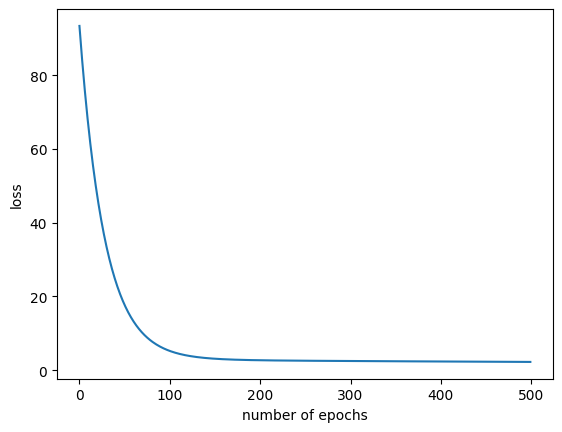

In [16]:
plt.plot(epoch_list, loss)
plt.xlabel('number of epochs')
plt.ylabel('loss')

Save the parameters in a dictionary

In [17]:
params = {"weight":w, "bias":b}

Predictor function

In [18]:
def predictor(x):
  return params["weight"] * x + params["bias"]

Plotting the best straight line

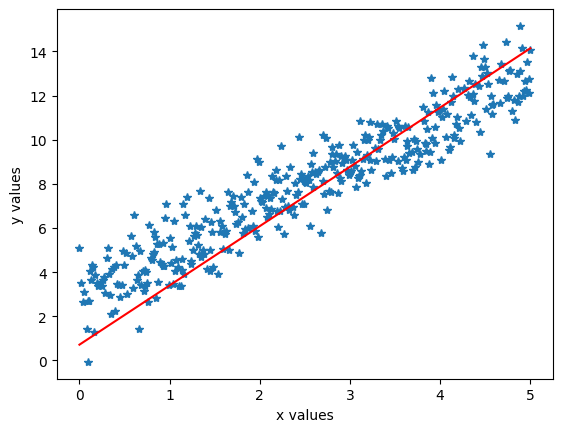

In [19]:
plt.plot(x_train, y_train, '*')
x_train_sort = np.sort(x_train)
pred_final = predictor(x_train_sort)
plt.plot(x_train_sort, pred_final,'r');
plt.xlabel("x values");
plt.ylabel("y values");

Evaluation on test set

In [21]:
y_test_pred = predictor(x_test) 

print("MSE on all test data", calc_mse(x, y, params["weight"], params["bias"]).numpy())
# select 5 random test data and check the performance 
indx = np.random.randint(0, 250, 5)
for i in range(len(indx)):
  print(f"predicted value : {y_test_pred[i]:3f}, actual value {y_test[i]:.3f}") 

MSE on all test data 2.2515867
predicted value : 2.571138, actual value 5.340
predicted value : 1.494724, actual value 1.687
predicted value : 13.389093, actual value 12.027
predicted value : 9.971480, actual value 9.666
predicted value : 2.167483, actual value 4.396
